# Random Search Algorithms

### Importing Necessary Libraries


In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import pandas as pd
import seaborn as sns
import mlrose_hiive
import matplotlib.pyplot as plt
np.random.seed(44)
sns.set_style("darkgrid")

### Defining Knapsack Problems Parameters

In [2]:
knapsack_len = 200
# weights between 10 to 50
knapsack_weights=np.random.uniform(10,50, knapsack_len)
# values between 10 to 20
knapsack_values=np.random.uniform(10,20, knapsack_len)

### Defining a fitness function and Optimization Problem Object

In [3]:
%%time
# DiscreteOpt() takes integers in range 0 to max_val -1 defined at initialization
max_weight_pct = 0.5
problem = mlrose_hiive.KnapsackOpt(weights = knapsack_weights, values = knapsack_values,
                                  max_weight_pct = max_weight_pct)

CPU times: user 226 µs, sys: 6 µs, total: 232 µs
Wall time: 237 µs


### Optimization #1 Genetic Algorithm

#### Run GA on Knapsack problem

In [4]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list = [10000],
                          max_attempts = 100,
                          population_sizes = [100, 500],
                          mutation_rates = [0.1, 0.25, 0.5])

ga_run_stats, ga_run_curves = ga.run()

CPU times: user 36.4 s, sys: 253 ms, total: 36.7 s
Wall time: 37.4 s


In [5]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005233,1527.84005,100.0,100,0.1,10000
1,1,0.017438,1653.55825,202.0,100,0.1,10000
2,2,0.024889,1653.55825,303.0,100,0.1,10000
3,3,0.032144,1653.55825,404.0,100,0.1,10000
4,4,0.039098,1653.55825,505.0,100,0.1,10000
...,...,...,...,...,...,...,...
1691,300,0.460448,2036.19639,150847.0,500,0.5,10000
1692,301,0.469233,2036.19639,151348.0,500,0.5,10000
1693,302,0.476165,2036.19639,151849.0,500,0.5,10000
1694,303,0.483258,2036.19639,152350.0,500,0.5,10000


#### Output Fitnes Value Statists

In [6]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
2036.2024278581025 2024.9008342547402 6.235364885666667
Mutation Rate
0.10    2015.619850
0.25    2029.038589
0.50    2030.044063
Name: Fitness, dtype: float64
Population Size
100    2013.761479
500    2036.040189
Name: Fitness, dtype: float64
Population Size
100     1.880436
500    10.590294
Name: Time, dtype: float64


#### Plot Fitness to Iterations Chart

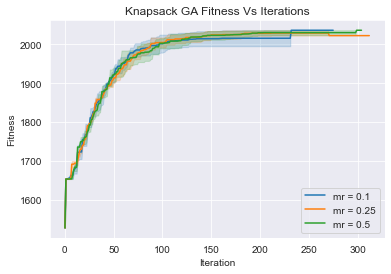

In [7]:
# draw lineplot 
ga_run_curves_mu1 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.1] 
ga_run_curves_mu2 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.25] 
ga_run_curves_mu3 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.5] 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu1, label = "mr = 0.1") 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu2, label = "mr = 0.25") 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu3, label = "mr = 0.5") 
plt.title('Knapsack GA Fitness Vs Iterations')
plt.show()

### Optimization #2 Simulated Annealing

#### Run SA on Knapsack problem

In [8]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[10000],
                           temperature_list=[10, 50, 100, 250, 500],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()

CPU times: user 1.91 s, sys: 48.4 ms, total: 1.96 s
Wall time: 1.93 s


#### Output Fitnes Value Statists

In [9]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print('Mean:', last_iters.Fitness.mean(), '\nMin:',last_iters.Fitness.max(),'\nMax:',last_iters.Fitness.max())
print('Mean Time;',last_iters.Time.mean())

Mean: 1604.1555989071885 
Min: 1713.6176213906024 
Max: 1713.6176213906024
Mean Time; 0.1858391164000004


#### Plot Fitness to Iterations Chart

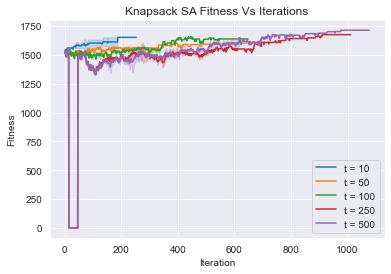

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000158,1527.840050,0.0,10.0,10000
1,1,0.002933,1527.840050,1.0,10.0,10000
2,2,0.003023,1545.823184,3.0,10.0,10000
3,3,0.003110,1531.883188,5.0,10.0,10000
4,4,0.003169,1531.883188,6.0,10.0,10000
...,...,...,...,...,...,...
5640,612,0.023774,1570.387239,881.0,500.0,10000
5641,613,0.023973,1570.387239,882.0,500.0,10000
5642,614,0.024158,1570.387239,883.0,500.0,10000
5643,615,0.024348,1570.387239,884.0,500.0,10000


In [10]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_sa_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_sa_curve.reset_index(inplace=True)


# draw lineplot 
sa_run_curves['Temperature'] = sa_run_curves['Temperature'].astype(str).astype(float)
sa_run_curves_t1 = sa_run_curves[sa_run_curves['Temperature'] == 10] 
sa_run_curves_t2 = sa_run_curves[sa_run_curves['Temperature'] == 50] 
sa_run_curves_t3 = sa_run_curves[sa_run_curves['Temperature'] == 100]
sa_run_curves_t4 = sa_run_curves[sa_run_curves['Temperature'] == 250] 
sa_run_curves_t5 = sa_run_curves[sa_run_curves['Temperature'] == 500] 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t1, label = "t = 10")
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t2, label = "t = 50") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t3, label = "t = 100") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t4, label = "t = 250") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t5, label = "t = 500") 
 
plt.title('Knapsack SA Fitness Vs Iterations')
plt.show()

# # draw lineplot 
# sns.lineplot(x="Iteration", y="Fitness", data=best_sa_curve) 
# plt.title('Knapsack SA Fitness Vs Iterations')
# plt.show()
sa_run_curves

### Optimization #3 MIMIC

#### Run MIMIC on Knapsack problem

In [11]:
%%time
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[10000],
                          max_attempts=100,
                          population_sizes=[100,500],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

CPU times: user 3min 19s, sys: 42.7 s, total: 4min 2s
Wall time: 4min 3s


#### Output Fitnes Value Statists

In [12]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())
mmc_run_curves

Max and mean
2018.2417846710173 1871.6384458957439 40.64641568366667
Keep Percent
0.10    1822.178174
0.25    1907.989039
0.50    1884.748124
Name: Fitness, dtype: float64
Population Size
100    1738.316525
500    2004.960366
Name: Fitness, dtype: float64
Population Size
100    13.099207
500    68.193624
Name: Time, dtype: float64


,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.004612,1527.840050,100.0,True,100,0.1,10000
1,1,0.063132,1593.571632,202.0,True,100,0.1,10000
2,2,0.113412,1639.286636,304.0,True,100,0.1,10000
3,3,0.161629,1658.306438,406.0,True,100,0.1,10000
4,4,0.210849,1658.306438,507.0,True,100,0.1,10000
...,...,...,...,...,...,...,...,...
788,178,7.925187,2010.589404,89715.0,True,500,0.5,10000
789,179,8.034267,2010.589404,90216.0,True,500,0.5,10000
790,180,8.146511,2010.589404,90717.0,True,500,0.5,10000
791,181,8.252866,2010.589404,91218.0,True,500,0.5,10000


#### Plot Fitness to Iterations Chart

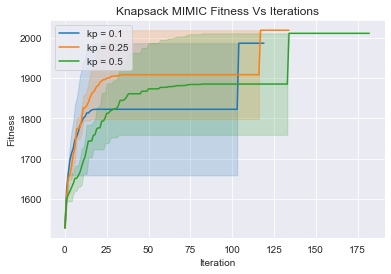

In [13]:
# draw lineplot 
mmc_run_curves_kp1 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.1] 
mmc_run_curves_kp2 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.25] 
mmc_run_curves_kp3 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.5] 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp1, label = "kp = 0.1") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp2, label = "kp = 0.25") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp3, label = "kp = 0.5") 
plt.title('Knapsack MIMIC Fitness Vs Iterations')
plt.show()


### Optimization #4 Randomized Hill Climbing


#### Run RHC on Knapsack problem

In [14]:
%%time
runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

CPU times: user 50.3 s, sys: 180 ms, total: 50.5 s
Wall time: 50.7 s


#### Output Fitnes Value Statists

In [15]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

1010.1284783241814 1647.3004190099377
50.65903577900002


#### Plot Fitness to Iterations Chart

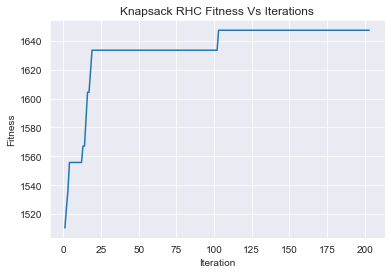

In [16]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_RHC_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_RHC_curve.reset_index(inplace=True)
best_RHC_curve
# draw lineplot 
sns.lineplot(x="Iteration", y="Fitness", data=best_RHC_curve) 
plt.title('Knapsack RHC Fitness Vs Iterations')
plt.show()

### Combine Best Fitnesss Curves from Each Algorithm for Comparison

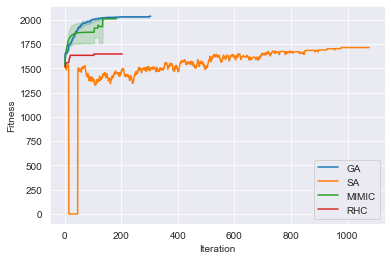

In [17]:
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu3, label = "GA") 
sns.lineplot(x="Iteration", y="Fitness", data=best_sa_curve, label = "SA") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves, label = "MIMIC") 
sns.lineplot(x="Iteration", y="Fitness", data=best_RHC_curve, label = "RHC") 
plt.show()